In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('train data.csv')

## Study Data and Exploratory Data Analysis


In [3]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
  ProductType Manufacturer Area Code Sourcing Channel Product Size  \
0        NTM3           X1       A28        WHOLESALE        Large   
1        NTM2           X1        A9           DIRECT        Large   
2        NTM3           X2       A20           DIRECT        Large   
3        NTM3           X1       A18        WHOLESALE        Small   
4        NTM2           X1       A28           DIRECT        Large   

  Product Type Month of Sourcing  Sourcing Cost  
0       Powder            May-21          10.16  
1       Powder            Oct-20         134.28  
2       Powder            Dec-20          12.46  
3       Powder            Feb-21         107.22  
4       Liquid            Nov-20         197.76  


In [4]:
print("Last few rows of the dataset:")
print(data.tail())

Last few rows of the dataset:
       ProductType Manufacturer Area Code Sourcing Channel Product Size  \
550171        NTM2           X1        A5           DIRECT        Large   
550172        NTM3           X1       A14           DIRECT        Large   
550173        NTM2           X1        A5           DIRECT        Small   
550174        NTM2           X1        A7           DIRECT        Small   
550175        NTM1           X1        A3           DIRECT        Small   

       Product Type Month of Sourcing  Sourcing Cost  
550171       Powder            Jul-20         136.47  
550172       Liquid            Oct-20          72.56  
550173       Powder            Mar-21         147.64  
550174       Powder            Feb-21         150.04  
550175       Powder            Nov-20         139.42  


In [5]:
print("\nInformation about the dataset:")
print(data.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550176 entries, 0 to 550175
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ProductType        550176 non-null  object 
 1   Manufacturer       550176 non-null  object 
 2   Area Code          550176 non-null  object 
 3   Sourcing Channel   550176 non-null  object 
 4   Product Size       550176 non-null  object 
 5   Product Type       550176 non-null  object 
 6   Month of Sourcing  550176 non-null  object 
 7   Sourcing Cost      550176 non-null  float64
dtypes: float64(1), object(7)
memory usage: 33.6+ MB
None


In [6]:
print("\nSummary statistics of numerical columns:")
print(data.describe())


Summary statistics of numerical columns:
       Sourcing Cost
count  550176.000000
mean      108.817286
std       104.390093
min      -196.070000
25%        57.000000
50%       132.000000
75%       146.150000
max     32632.500000


In [7]:
#Since there are negative values in sourcing cost. remove them.

cleaned_data = data[data['Sourcing Cost'] > 0]
cleaned_data.describe()

,Sourcing Cost
count,534400.000000
mean,112.039835
std,104.192220
min,0.010000
25%,64.230000
50%,133.300000
75%,146.700000
max,32632.500000


In [8]:
print("\nMissing values in the dataset:")
print(cleaned_data.isnull().sum())


Missing values in the dataset:
ProductType          0
Manufacturer         0
Area Code            0
Sourcing Channel     0
Product Size         0
Product Type         0
Month of Sourcing    0
Sourcing Cost        0
dtype: int64


## Data Visualization

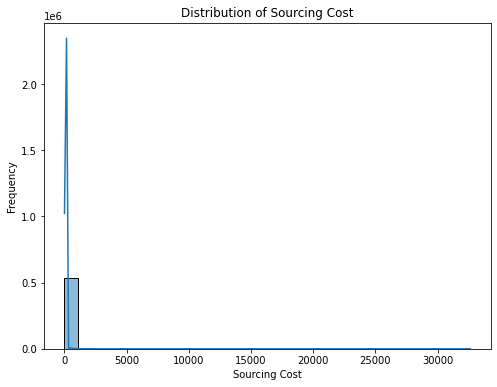

In [9]:
# Visualizing the distribution of the 'Sourcing Cost' variable
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_data['Sourcing Cost'], bins=30, kde=True)
plt.title('Distribution of Sourcing Cost')
plt.xlabel('Sourcing Cost')
plt.ylabel('Frequency')
# plt.xlim(0, 4000)  # Adjust x-axis limits based on the range of values
plt.show()


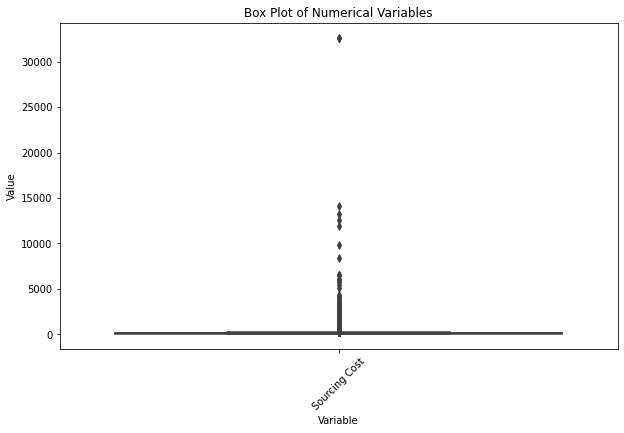

In [10]:
# Create box plots for each numerical variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data)
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()


## Handling Outliers

In [11]:
threshold_99th = cleaned_data['Sourcing Cost'].quantile(0.99)

# Set the threshold
threshold = threshold_99th

# Identify observations exceeding the threshold
cleaned_data_df = cleaned_data[cleaned_data['Sourcing Cost'] < threshold]

In [12]:
threshold_5th = cleaned_data_df['Sourcing Cost'].quantile(0.05)
cleaned_data_df = cleaned_data_df[cleaned_data_df['Sourcing Cost'] > threshold_5th]

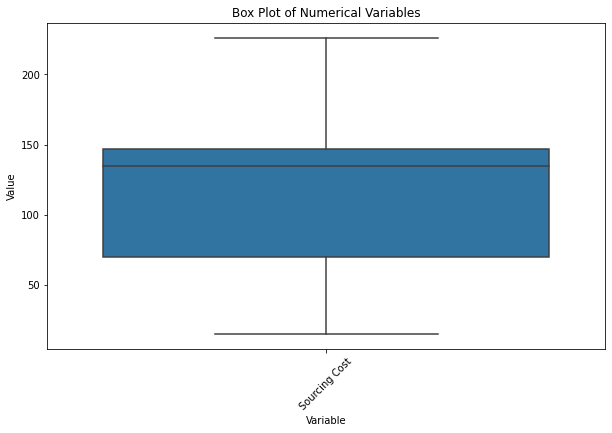

In [13]:
# Create box plots for each numerical variable
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_data_df)
plt.title('Box Plot of Numerical Variables')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [14]:
cleaned_data_df.describe()

,Sourcing Cost
count,502574.000000
mean,114.151816
std,48.492066
min,14.960000
25%,70.000000
50%,134.670000
75%,146.970000
max,226.080000


## Data Visualization

In [15]:
# # Visualizing the correlation matrix
# plt.figure(figsize=(10, 8))
# sns.heatmap(cleaned_data_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Correlation Matrix')
# plt.show()

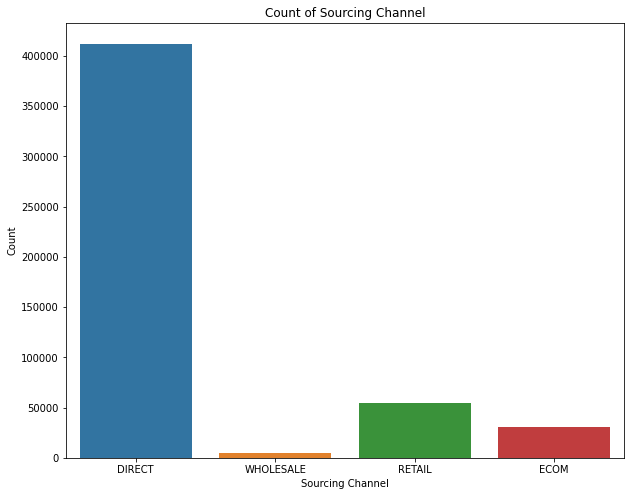

In [16]:
# Visualizing categorical variables
plt.figure(figsize=(10, 8))
sns.countplot(x='Sourcing Channel', data=cleaned_data_df)
plt.title('Count of Sourcing Channel')
plt.xlabel('Sourcing Channel')
plt.ylabel('Count')
plt.show()

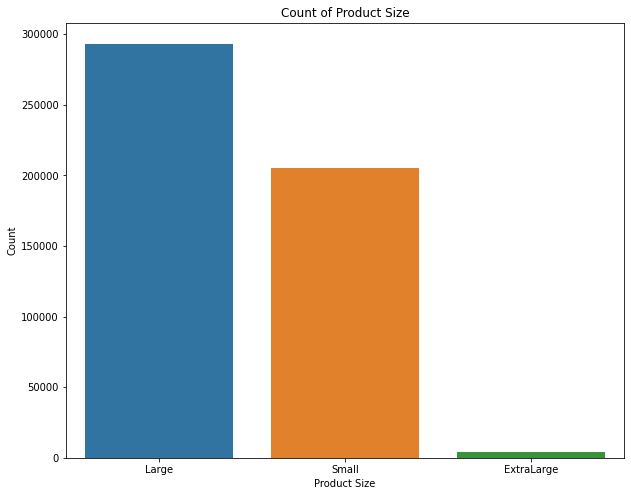

In [17]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Product Size', data=cleaned_data_df)
plt.title('Count of Product Size')
plt.xlabel('Product Size')
plt.ylabel('Count')
plt.show()

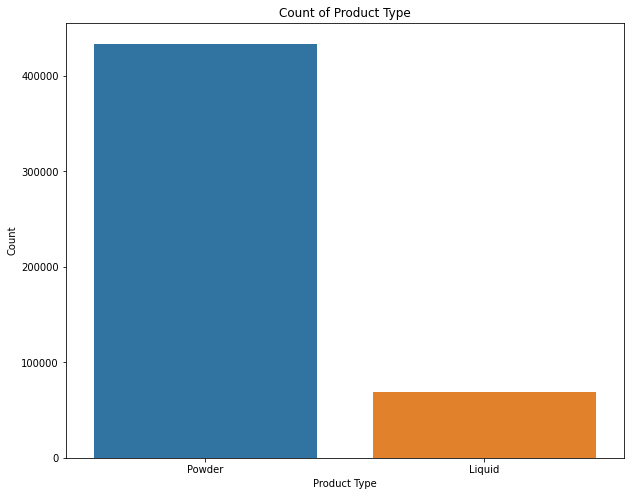

In [18]:
plt.figure(figsize=(10, 8))
sns.countplot(x='Product Type', data=cleaned_data_df)
plt.title('Count of Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.show()


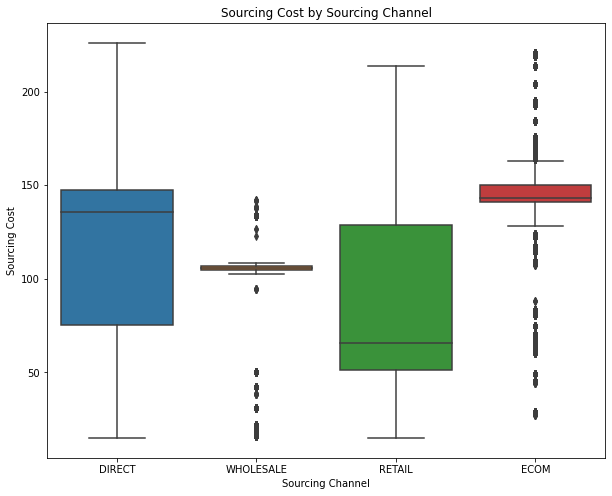

In [19]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Sourcing Channel', y='Sourcing Cost', data=cleaned_data_df)
plt.title('Sourcing Cost by Sourcing Channel')
plt.xlabel('Sourcing Channel')
plt.ylabel('Sourcing Cost')
plt.show()



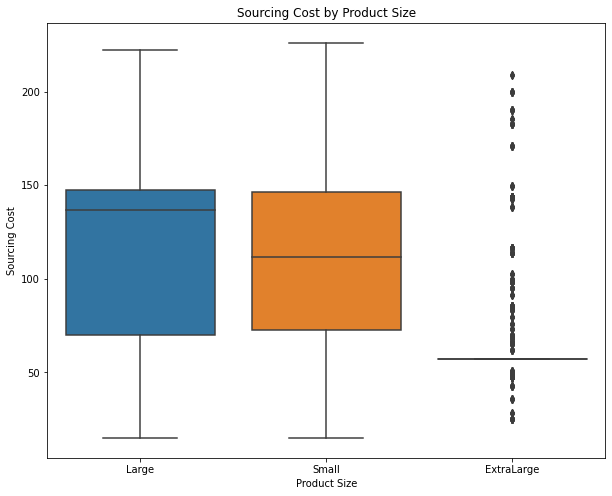

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Product Size', y='Sourcing Cost', data=cleaned_data_df)
plt.title('Sourcing Cost by Product Size')
plt.xlabel('Product Size')
plt.ylabel('Sourcing Cost')
plt.show()



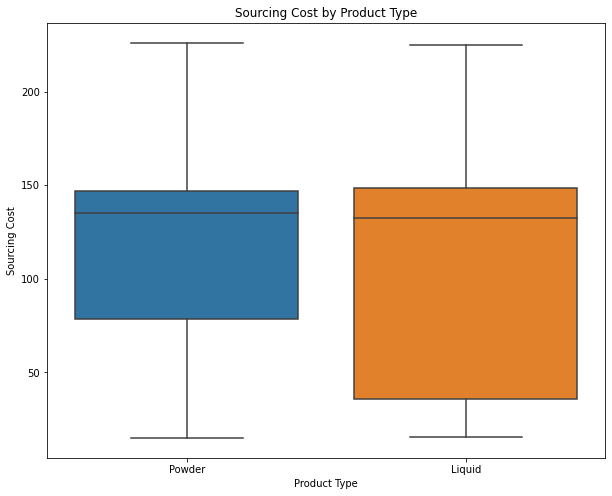

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Product Type', y='Sourcing Cost', data=cleaned_data_df)
plt.title('Sourcing Cost by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Sourcing Cost')
plt.show()

In [22]:
# from sklearn.ensemble import RandomForestRegressor
# X = data.drop(['Sourcing Cost'], axis=1)
# y = data['Sourcing Cost']

# # Creating and fitting the Random Forest model
# model = RandomForestRegressor(random_state=42)
# model.fit(X, y)

# # Getting feature importances
# importances = model.feature_importances_

# # Sorting feature importances in descending order
# indices = np.argsort(importances)[::-1]

# # Visualizing feature importances
# plt.figure(figsize=(10, 6))
# plt.title("Feature Importances")
# plt.bar(range(X.shape[1]), importances[indices], align="center")
# plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
# plt.xlim([-1, X.shape[1]])
# plt.ylabel("Importance")
# plt.xlabel("Feature")
# plt.tight_layout()
# plt.show()

In [23]:
data_encoded = pd.get_dummies(cleaned_data_df, columns=['ProductType', 'Manufacturer', 'Sourcing Channel', 'Product Size', 'Product Type'])

C:\Users\TANAYA\AppData\Local\Temp/ipykernel_4404/3945436753.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


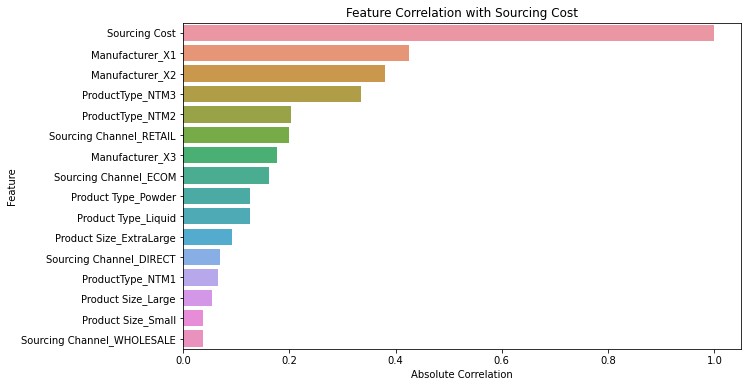

In [24]:

# Calculating correlation matrix with the target variable
correlation_matrix = data_encoded.corr()

# Sorting correlation values with the target variable
correlation_with_target = correlation_matrix['Sourcing Cost'].abs().sort_values(ascending=False)

# Visualizing feature correlation with the target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index)
plt.title("Feature Correlation with Sourcing Cost")
plt.xlabel("Absolute Correlation")
plt.ylabel("Feature")
plt.show()

In [25]:
cleaned_data_df

,ProductType,Manufacturer,Area Code,Sourcing Channel,Product Size,Product Type,Month of Sourcing,Sourcing Cost
1,NTM2,X1,A9,DIRECT,Large,Powder,Oct-20,134.28
3,NTM3,X1,A18,WHOLESALE,Small,Powder,Feb-21,107.22
4,NTM2,X1,A28,DIRECT,Large,Liquid,Nov-20,197.76
5,NTM1,X1,A10,DIRECT,Large,Powder,Sep-20,137.93
6,NTM2,X1,A19,DIRECT,Large,Powder,Sep-20,105.59
...,...,...,...,...,...,...,...,...
550171,NTM2,X1,A5,DIRECT,Large,Powder,Jul-20,136.47
550172,NTM3,X1,A14,DIRECT,Large,Liquid,Oct-20,72.56
550173,NTM2,X1,A5,DIRECT,Small,Powder,Mar-21,147.64
550174,NTM2,X1,A7,DIRECT,Small,Powder,Feb-21,150.04


In [26]:
data_encoded

,Area Code,Month of Sourcing,Sourcing Cost,ProductType_NTM1,ProductType_NTM2,ProductType_NTM3,Manufacturer_X1,Manufacturer_X2,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
1,A9,Oct-20,134.28,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
3,A18,Feb-21,107.22,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1
4,A28,Nov-20,197.76,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0
5,A10,Sep-20,137.93,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1
6,A19,Sep-20,105.59,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550171,A5,Jul-20,136.47,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1
550172,A14,Oct-20,72.56,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0
550173,A5,Mar-21,147.64,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1
550174,A7,Feb-21,150.04,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1


In [27]:
data_encoded_cleaned = pd.get_dummies(cleaned_data_df, columns=['Area Code','ProductType', 'Manufacturer', 'Sourcing Channel','Product Size', 'Product Type'])

In [28]:
X_train = data_encoded_cleaned.drop([ 'Month of Sourcing', 'Sourcing Cost'], axis=1)
y_train = data_encoded['Sourcing Cost']

In [29]:
X_train

,Area Code_A1,Area Code_A10,Area Code_A11,Area Code_A12,Area Code_A13,Area Code_A14,Area Code_A15,Area Code_A16,Area Code_A17,Area Code_A18,...,Manufacturer_X3,Sourcing Channel_DIRECT,Sourcing Channel_ECOM,Sourcing Channel_RETAIL,Sourcing Channel_WHOLESALE,Product Size_ExtraLarge,Product Size_Large,Product Size_Small,Product Type_Liquid,Product Type_Powder
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
5,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550171,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
550172,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
550173,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
550174,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1


#### Random Forest for the regression task in this context have been made based on its versatility, robustness, and effectiveness in handling a wide range of datasets, including those with mixed data types and nonlinear relationships between features and target variables

In [30]:
from  sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [31]:
df_test=pd.read_csv('test data.csv')

In [32]:
data_encoded_test = pd.get_dummies(df_test, columns=['Area Code','ProductType', 'Manufacturer', 'Sourcing Channel','Product Size', 'Product Type' ])

In [33]:
X_test= data_encoded_test.drop([ 'Month of Sourcing', 'Sourcing Cost'], axis=1)
y_test = data_encoded_test['Sourcing Cost']

In [34]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 17.413008123197343


In [35]:
from sklearn.metrics import mean_squared_error, accuracy_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)


Mean Squared Error (MSE): 1138.8901941054705


In [36]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("r2 score:", r2)

r2 score: 0.5802035431596619


In [37]:
y_pred

array([103.85217438, 145.60125502, 148.40622283, 142.3886242 ,
       162.73494491, 171.4510677 ,  48.78309831,  72.8974325 ,
       143.12283685, 139.70840888, 143.64701357, 133.76193549,
        94.62689285, 141.02341959, 141.13853917, 153.48325603,
       151.74437254, 142.11475128, 142.98904834, 143.972562  ,
       146.28998233, 142.75630804, 146.94506986,  40.00016188,
        76.89614017,  35.41309207,  80.41057249,  31.26437707,
        24.65639067, 195.95155096, 175.87871363, 162.75000609,
        58.1832318 ,  26.51144087,  68.90111661, 143.72435041,
       156.19325441, 143.15234444, 142.77335269, 106.0997306 ,
        58.34419502, 110.7527575 , 171.1782742 , 165.31888731,
       103.0686928 ,  39.44125158, 206.32660858, 204.28000181,
       102.51358866,  67.45973427,  64.49644204, 143.21683092,
        99.70349582,  62.07478686, 180.8410835 , 158.88565532,
       170.40841494, 196.12010726, 182.79715442, 140.62099351,
       133.94968245, 143.15334816, 143.95443635, 142.65